In [2]:
%load_ext autoreload
%autoreload 2
import os
import sys
import scanpy as sc
import numpy as np
import pandas as pd
import time
import utils
import argparse
import Tangram as tg
import scipy
import assign_coordinates as ac

In [3]:
# Read scRNA-seq and ST data
utils.info("Read scRNA-seq and ST data...")
adata_sc = sc.read_h5ad("/home/user/data2/rbase/STellaris/public/examples/Human_cSCC/sc.h5ad")
adata_sp = utils.read_sp(input_h5ad="/home/user/data3/uplee/projects/spatialTransWeb/spatial/visualization/STW-H-Skin-ST-1/GSM4284318/GSM4284318.input.h5ad", use_raw=True)

Read scRNA-seq and ST data...


In [4]:
# 添加GPU环境变量
os.environ['CUDA_VISIBLE_DEVICES'] = '0,1'
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# Initiate Tangram instance
utils.info("Initiate tangram instance...")
tg_ins = tg.Tangram(ad_sc=adata_sc, ad_sp=adata_sp, 
                    output_dir="/home/user/data2/rbase/spatial_annotate_scripts/data/STW-M-Brain-Stereo-seq-1/", cell_type_key='cell_type')

Initiate tangram instance...
Read in ad_sc and ad_sp


In [5]:
# Perform tangram mapping
utils.info("Perform tangram mapping...")
start_time = time.time()
tg_ins.run_tangram(mode="cells", num_epochs=100)
end_time = time.time()
elapsed_time = end_time - start_time
print("Training time: " + str(elapsed_time / 60) + " minutes")

Perform tangram mapping...
Get marker
Run pp_adatas


INFO:root:1183 training genes are saved in `uns``training_genes` of both single cell and spatial Anndatas.
INFO:root:15745 overlapped genes are saved in `uns``overlap_genes` of both single cell and spatial Anndatas.
INFO:root:uniform based density prior is calculated and saved in `obs``uniform_density` of the spatial Anndata.
INFO:root:rna count based density prior is calculated and saved in `obs``rna_count_based_density` of the spatial Anndata.
INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 1183 genes and rna_count_based density_prior in cells mode...


Run tangram mapping


INFO:root:Printing scores every 100 epochs.


Score: 0.496, KL reg: 0.423


INFO:root:Saving results..


Training time: 0.07704537709554037 minutes


In [26]:
# Assign single cell positions
tg_ins.project_cell_positions()
# save registered sc h5ad
tg_ins.save()

Project single cells to the positions of ST data
           0        1
0     3087.4   9550.9
1     3088.4   9950.9
2     3264.7   9349.9
3     3268.3   9749.1
4     3269.8  10552.1
..       ...      ...
633  10657.9   9164.8
634  10650.5   9561.6
635  10653.8   9965.4
636  10663.3  10371.9
637  10665.3  10770.1

[638 rows x 2 columns]
           0       1
0     7600.1  8556.1
1     4895.0  7944.3
2     6531.0  5770.5
3     6894.4  5760.7
4     6528.3  7371.4
...      ...     ...
2360  6714.5  3955.5
2361  8682.1  7757.2
2362  6521.4  6167.0
2363  5265.6  8769.9
2364  7061.8  9964.1

[2365 rows x 2 columns]
                0            1
0     7588.779219  8429.126111
1     4898.829584  8097.972432
2     6437.903678  5866.846937
3     6803.998087  5739.980913
4     6700.285539  7419.061669
...           ...          ...
2360  6678.436063  4096.640741
2361  8699.829341  7925.318909
2362  6612.668200  6310.903245
2363  5397.906629  8887.690833
2364  6946.122687  9948.078144

[2365 rows x 

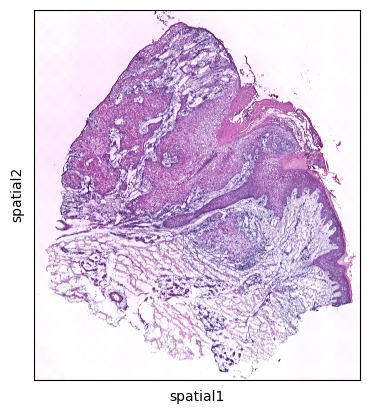

In [11]:
sc.pl.spatial(tg_ins.adata_sp, spot_size=5,scale_factor=1)

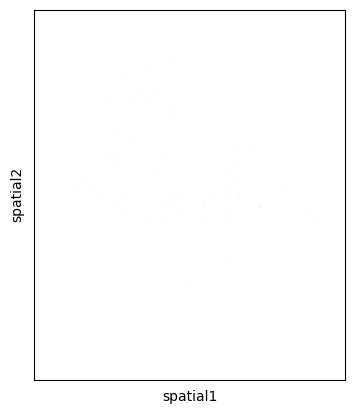

In [7]:
sc.pl.spatial(tg_ins.adata_sc_ann, spot_size=5,scale_factor=1)

In [7]:
adata_sc = sc.read_h5ad("/home/user/data3/uplee/projects/spatialTransWeb/spatial/visualization/STW-M-Brain-Stereo-seq-1/coronal_1/coronal_1.input.h5ad")

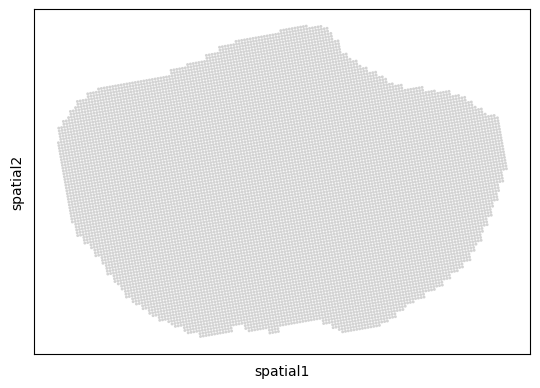

In [8]:
sc.pl.spatial(adata_sc, spot_size=1)

In [9]:
sc.pl.spatial(tg_ins.adata_sc_ann, color="cell_type")

NameError: name 'tg_ins' is not defined